### Sentiment Analysis




A traditional method of analyzing texts is to computer what proportion of the words have positive connotations, negative connotations or are neutral. This is commonly referred to as sentiment analysis. The typical approach to sentiment analysis is to see how many words in a text are also in a predefined list of words associated with a sentiment. So "I am having a bad day." might score a "1" on a negative sentiment scale for the presence of "bad" or a .17 because one of six of the words are negative. Some sentiment systems rank words on a scale, so that "terrific" might be a 5 while "fine" scores a 1. 

Some systems go beyond positive and negative. The proprietary LIWC program, for example, extends this to measure dozens of other word attributes, such as "tone", "analytic thinking", and "clout".

This section introduces two different dictionaries that are available in Python, AFINN and Vader.

#### AFINN

[AFINN](http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010) is an English word listed developed by Finn Årup Nielsen. Words scores range from minus five (negative) to plus five (positive). If this is your first time running this notebook, you may need to install it:

```
!pip install afinn
```

In [8]:
from afinn import Afinn

After importing `Afinn`, you need to set the language, English (`en`), Danish (`da`), or emoticon (`emoticons`). 

In [9]:
afinn = Afinn(language='en')

The `score` method returns the sum of word valence scores.

In [10]:
afinn.score('Bad day.')

-3.0

In [11]:
afinn.score('Good day.')

3.0

In [12]:
afinn.score('Horrible, bad day.')

-6.0

We can use Afinn to analyze a larger text database.  Aashita Kesarwani put together a [corpus](https://www.kaggle.com/aashita/nyt-comments/home) of comments made to New York Times articles. I sampled 10,000 of these from April, 2017.  

Before opening this as a dataframe, I import pandas and enable graphs to be displayed in the Jupyter notebook.

In [13]:
import pandas as pd
%matplotlib inline

In [14]:
nyt_df = pd.read_json('data/nyt_201704_comments.json')

In [15]:
nyt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
articleID           10000 non-null object
commentBody         10000 non-null object
commentID           10000 non-null int64
commentType         10000 non-null object
createDate          10000 non-null int64
editorsSelection    10000 non-null bool
recommendations     10000 non-null int64
replyCount          10000 non-null int64
sectionName         10000 non-null object
userDisplayName     9997 non-null object
userID              10000 non-null int64
userLocation        9999 non-null object
dtypes: bool(1), int64(5), object(6)
memory usage: 947.3+ KB


In [16]:
nyt_df.head()

,articleID,commentBody,commentID,commentType,createDate,editorsSelection,recommendations,replyCount,sectionName,userDisplayName,userID,userLocation
0,58ef8bfc7c459f24986da097,"Tragedies abound in war, precision munitions n...",22148699,comment,1492123756,False,1,0,Middle East,Bill Owens,66371869,Essex
1,58e5a1507c459f24986d8a56,"""...but then again, please get off my lawn"" ma...",22053980,comment,1491481436,False,6,0,Unknown,Mike P,56758055,Long Island
2,58ff102d7c459f24986dbe81,Just another flim-flam plan to shuffle mor...,22263548,comment,1493128804,False,13,1,Politics,giniajim,1651431,VA
3,58ec83fb7c459f24986d98cd,"What do you mean, nice try? Moynihan Station ...",22113999,userReply,1491924651,False,1,0,Unknown,Guy Walker,55823171,New York City
4,58fcbc357c459f24986db9d0,"Where I live, in a city where cabs are plentif...",22247141,comment,1492971817,True,124,6,Unknown,plphillips,18764882,Washington DC


To estimate the Afinn sentiment score for all of the responses in the dataframe, we can `apply` the scorer to create a new column. This takes a couple of seconds.

In [17]:
nyt_df['afinn_score'] = nyt_df['commentBody'].apply(afinn.score)

`describe` gives a sense of the distribution. 

In [18]:
nyt_df['afinn_score'].describe()

count    10000.000000
mean        -0.283000
std          7.166188
min       -130.000000
25%         -3.000000
50%          0.000000
75%          3.000000
max         42.000000
Name: afinn_score, dtype: float64

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Load the trump speech database. Compute the sentiment for each speech</code>.

</div>


It is also useful to sort by `afinn_score` to get a sense of what the extreme scoring comments look like. In this case, I subset the dataframe to display just the two relevant columns. 

In [14]:
columns_to_display = ['commentBody', 'afinn_score']

nyt_df.sort_values(by = 'afinn_score')[columns_to_display].head(10)

,commentBody,afinn_score
9348,"Well Bill, nobody will be able to say that you...",-130.0
5893,"""Don’t Weaken Title IX Campus Sex Assault Poli...",-62.0
1510,Would you describe (former prime minister of I...,-54.0
3378,"""I disapprove of what you say, but I will defe...",-54.0
3956,The ultimate weakness of violence is that it i...,-52.0
9353,The “Dirty Muslim”\n\nShe is called a “Dirty M...,-46.0
7788,Democracy and western civilization are doing j...,-43.0
4446,Immigrants\n\nImmigration purge\nEverybody is...,-42.0
80,"Factual error: There has been no ""rapid fallof...",-42.0
7571,"This is all fine and dandy, except for the fac...",-39.0


By default, the sort is ascending, mean the lowest scoring, or most negative comments, are displayed by `head`. The comments with highest score are shown with `tail`. 

In [15]:
nyt_df.sort_values(by = 'afinn_score')[columns_to_display].tail(10)

,commentBody,afinn_score
4949,Aside from the question of whether positive th...,32.0
3617,I found myself immensely enjoying this when I ...,33.0
7912,How is prepping for the SATs gaming the system...,34.0
6085,"""'You Create That Chemistry': How Actors Fall ...",35.0
3971,I'd like to see the discussion moved up a leve...,37.0
2523,His lawyers are grasping at straws.... In the ...,38.0
3486,I applaud the spirit of this column and agree ...,38.0
8495,My goodness... This hit home for me in so many...,39.0
9717,When I look at the American actresses of Clair...,41.0
9205,"""Driven | 2017 Porsche 911 Turbo S""\n\n Since...",42.0


One of the drawbacks to using the raw Afinn score is the that longer texts may yield higher values simply because they contain more words. To adjust for that, we can divide the score by the number of words in the text. 

In a prior section, we developed a small function that would count the number of words.

In [16]:
def word_count(text_string):
    '''Calculate the number of words in a string'''
    return len(text_string.split())

You can reuse that here to create a new column, `word_count` using `appply` to the text column, `commentBody`.

In [17]:
nyt_df['word_count'] = nyt_df['commentBody'].apply(word_count)

We can divide the two columns to produce `afinn_adjusted`. This isn't exactly a percentage variable, since word scores in Afinn can range from -5 to 5, but it is a useful adjustment to control for variable comment length. To make it clearer that this isn't a percent score, and to make the results more readable, the adjustment is multiplied by 100.

In [21]:
nyt_df['afinn_adjusted'] = nyt_df['afinn_score'] / nyt_df['word_count']  * 100

In [22]:
nyt_df['afinn_adjusted'].describe()

count    10000.000000
mean         0.216934
std         14.222974
min       -100.000000
25%         -6.000000
50%          0.000000
75%          5.882353
max        266.666667
Name: afinn_adjusted, dtype: float64

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Using the adjusted measure, what was the date of Trump's most positive speech? Most negative?

</div>



You can use `groupby` to see how the sentiment score varies by key characteristics, such as whether or not a New York Times editor highlighted the comment.

In [38]:
nyt_df.groupby('editorsSelection')['afinn_adjusted'].describe()

,count,mean,std,min,25%,50%,75%,max
editorsSelection,,,,,,,,
False,9783.0,0.245986,14.302260,-100.000000,-6.000000,0.0,5.882353,266.666667
True,217.0,-1.092828,9.952139,-61.904762,-5.504587,0.0,3.875969,60.000000


The above syntax is a little complex.
* `nyt_df` is the dataframe we want to use;
* `.groupby('editorsSelection')` creates a pandas `groupby` object split by the values of `editorsSelection`;
* `['afinn_adjusted']` is the specific column we want to focus on;
* `.describe()` produces descriptive statistics for each of the groups.

Overall, the findings suggest that editors select comments with more of a negative tone. Pandas can also create the absolute value of a variable using the `abs` method. This is useful for exploring to what extent, in this case, editors embrace or avoid comments that are extreme, either positive or negative.

In [45]:
nyt_df['afinn_adjusted_abs'] = nyt_df['afinn_adjusted'].abs()

In [52]:
nyt_df.groupby('editorsSelection')['afinn_adjusted_abs'].describe()

,count,mean,std,min,25%,50%,75%,max
editorsSelection,,,,,,,,
False,9783.0,8.930247,11.173974,0.0,2.301499,5.960265,11.721444,266.666667
True,217.0,6.399846,7.687472,0.0,1.612903,4.562738,8.724832,61.904762


Here, there seems to be some evidence that editors are avoiding comments with extreme sentiment, as values are lower across the board for the editor's selections. 

<div class="alert alert-info">
<h3> Your turn</h3>
<p> In your group: what was the most positive speech given during the 2016 election?

</div>


#### Vader


```
!pip install vaderSentiment
```


A second method for sentiment analysis is Vader (Valence Aware Dictionary and sEntiment Reasoner). According to the authors, it is, "a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media." As with Afinn, Vader measures both the strenght and direction of sentiment. Based on the work of 10 coders, the Vader dictionary includes approximately 7,500 words, emoticons, emojis, acronyms, and commonly used slang. There is a version included with nltk (`from nltk.sentiment.vader import SentimentIntensityAnalyzer`) but a more recent version can be separately installed:



In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [25]:
analyzer = SentimentIntensityAnalyzer()

In [26]:
analyzer.polarity_scores('Horrible bad day.')

{'compound': -0.7906, 'neg': 0.875, 'neu': 0.125, 'pos': 0.0}

The `polarity_scores` method returns a dictionary with four items. 
* `pos`, `neu`, and `neg`  are the proportions of text that fall in each category.
* `compound` is the normalized, weighted composite score. 

One useful feature of Vader is that it is able to look at works in context and score approriately. 

In [27]:
analyzer.polarity_scores("At least it isn't a horrible book.")

{'compound': 0.431, 'neg': 0.0, 'neu': 0.637, 'pos': 0.363}

In [28]:
analyzer.polarity_scores('Today SUX!')

{'compound': -0.5461, 'neg': 0.779, 'neu': 0.221, 'pos': 0.0}

In [29]:
analyzer.polarity_scores('💋')

{'compound': 0.4215, 'neg': 0.0, 'neu': 0.263, 'pos': 0.737}

In [36]:
df= pd.DataFrame([{'sentence': 'Hotel had excellent breakfast.'}, 
              {'sentence': 'What a rotten morning.'}])

In [37]:
sentiment = df['sentence'].apply(analyzer.polarity_scores)

In [38]:
sentiment

0    {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...
1    {'neg': 0.623, 'neu': 0.377, 'pos': 0.0, 'comp...
Name: sentence, dtype: object

In [39]:
pd.DataFrame(sentiment.tolist())

,compound,neg,neu,pos
0,0.5719,0.000,0.448,0.552
1,-0.5106,0.623,0.377,0.000


In [40]:
def vaderize(df, textfield):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    
    sid = SentimentIntensityAnalyzer()

    sentiment = df[textfield].apply(sid.polarity_scores)
    sdf = pd.DataFrame(sentiment.tolist()).add_prefix('vader_')
    
    df_combined = pd.concat([df, sdf], axis = 1)
    return df_combined

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Using Vader, in your group: what was the most negative speech given during the 2016 election?

</div>



In [41]:
vaderize(df, 'sentence')

,sentence,vader_compound,vader_neg,vader_neu,vader_pos
0,Hotel had excellent breakfast.,0.5719,0.000,0.448,0.552
1,What a rotten morning.,-0.5106,0.623,0.377,0.000


<div class="alert alert-info">
<h3> Your turn</h3>
<p> Pick a speech. Compute the sentiment for each sentence.

</div>


In [16]:
from nltk.tokenize import sent_tokenize

In [17]:
speech_sentences =  sent_tokenize(speech)

In [18]:
speech_sentences[:5]

['This is amazing.',
 'What a great place.',
 'Thank you very much.',
 'We have thousands of people outside trying to get in.',
 'But we should start.']

In [19]:
speech_df = pd.DataFrame(speech_sentences, 
                         columns = ['sentence'])

In [20]:
speech_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 1 columns):
sentence    774 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


In [21]:
speech_df.head(10)

,sentence
0,This is amazing.
1,What a great place.
2,Thank you very much.
3,We have thousands of people outside trying to ...
4,But we should start.
5,Do we agree?
6,We should start.
7,So they'll come in.
8,They'll come in.
9,First of all I want to thank you.


In [77]:
speech_df = vaderize(speech_df, 'sentence')

In [78]:
speech_df.head()

,sentence,vader_compound,vader_neg,vader_neu,vader_pos,vader_compound,vader_neg,vader_neu,vader_pos
0,This is amazing.,0.5859,0.0,0.345,0.655,0.5859,0.0,0.345,0.655
1,What a great place.,0.6249,0.0,0.328,0.672,0.6249,0.0,0.328,0.672
2,Thank you very much.,0.3612,0.0,0.545,0.455,0.3612,0.0,0.545,0.455
3,We have thousands of people outside trying to get in.,0.0000,0.0,1.000,0.000,0.0000,0.0,1.000,0.000
4,But we should start.,0.0000,0.0,1.000,0.000,0.0000,0.0,1.000,0.000


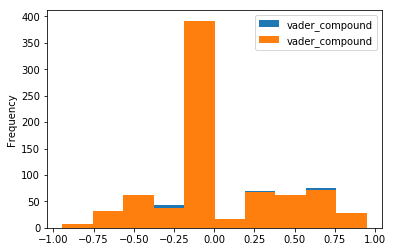

In [79]:
speech_df['vader_compound'].plot(kind='hist')

In [37]:
pd.set_option('display.max_colwidth', 200)

In [38]:
speech_df.sort_values(by = 'vader_compound').head()

,sentence,vader_compound,vader_neg,vader_neu,vader_pos
505,"We will stop illegal immigration, deport all criminal aliens and dismantle every last criminal gang and cartel threatening our citizens.",-0.9432,0.516,0.484,0.00
422,"When I'm elected president, we will suspend the Syrian refugee program...and we will keep radical Islamic terrorists the hell out of our country.",-0.9001,0.355,0.645,0.00
582,Hillary and her failed establishment have trillion dollars on wars in the Middle East that we never win.,-0.8742,0.399,0.601,0.00
406,What the hell do you have to lose?,-0.8074,0.549,0.451,0.00
673,"Don't forget that's hard because nobody else ever had a field that big or that violent, or that violent.",-0.7807,0.315,0.565,0.12


In [39]:
speech_df.sort_values(by = 'vader_compound').tail()

,sentence,vader_compound,vader_neg,vader_neu,vader_pos
638,And it's so wonderful to have support of people like that.,0.8733,0.0,0.446,0.554
701,Honest Abe was pretty -- he was pretty good.,0.9118,0.0,0.284,0.716
13,One day we are going to win the great state of North Carolina...\n\nAnd we are going to win back the White House.,0.9136,0.0,0.631,0.369
538,"I'm honored to have the endorsements of more than 200 top admirals and generals, and 22 Medal of Honor recipients.",0.9282,0.0,0.506,0.494
767,"Because if we win tomorrow, we will be able to make America wealthy again, to make America strong again, to make America safe again, and to make America great again.",0.9485,0.0,0.601,0.399


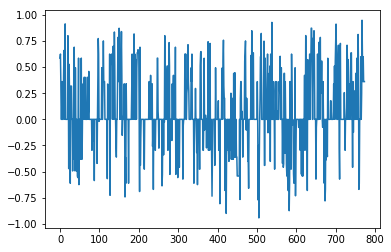

In [41]:
speech_df['vader_compound'].plot()

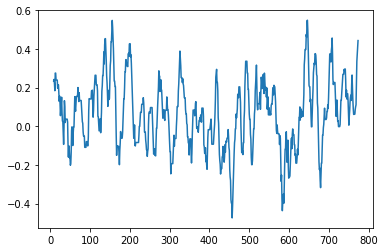

In [43]:
speech_df['vader_compound'].rolling(10).mean().plot()

In [81]:
def plot_sentiment(speech_text):
    speech_sentences =  sent_tokenize(speech_text)
    speech_df = pd.DataFrame(speech_sentences, 
                             columns = ['sentence'])
    speech_df = vaderize(speech_df, 'sentence')
    speech_df['vader_compound'].rolling(10).mean().plot()